In [1]:
import pandas  as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, matthews_corrcoef, confusion_matrix, mean_absolute_error, r2_score

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.duplicated().sum()

1081

In [7]:
data = data.drop_duplicates()

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [9]:
fraud = data[data["Class"] == 1]
legitimate = data[data["Class"] == 0]

In [10]:
print("Following are the Fraud Amount Details: ")
print(fraud.Amount.info())
print(fraud.Amount.describe())

Following are the Fraud Amount Details: 
<class 'pandas.core.series.Series'>
Int64Index: 473 entries, 541 to 281674
Series name: Amount
Non-Null Count  Dtype  
--------------  -----  
473 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB
None
count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [11]:
print("Following are the legitimate Amount Details: ")
print(legitimate.Amount.info())
print(legitimate.Amount.describe())

Following are the legitimate Amount Details: 
<class 'pandas.core.series.Series'>
Int64Index: 283253 entries, 0 to 284806
Series name: Amount
Non-Null Count   Dtype  
--------------   -----  
283253 non-null  float64
dtypes: float64(1)
memory usage: 4.3 MB
None
count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64


# EDA

Text(0.5, 0, 'Time in seconds')

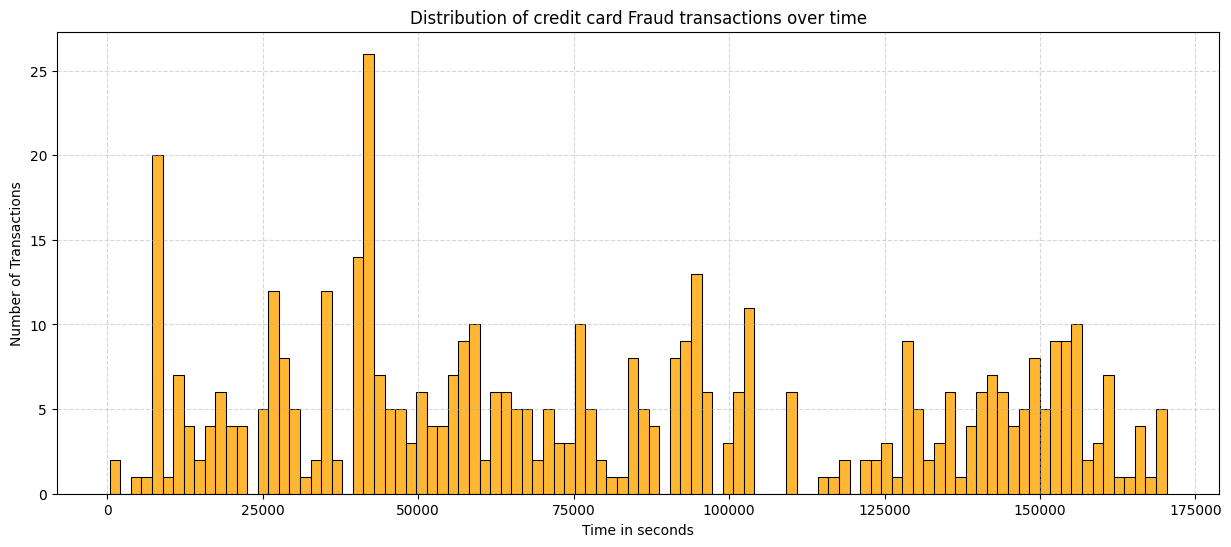

In [12]:
plt.figure(figsize=(15,6))
sns.histplot(data.Time[data.Class == 1], bins=100, alpha=0.8, color="orange")
plt.grid(linestyle='--', alpha=0.5)
plt.title("Distribution of credit card Fraud transactions over time")
plt.ylabel("Number of Transactions")
plt.xlabel("Time in seconds")

Text(0.5, 0, 'Time in seconds')

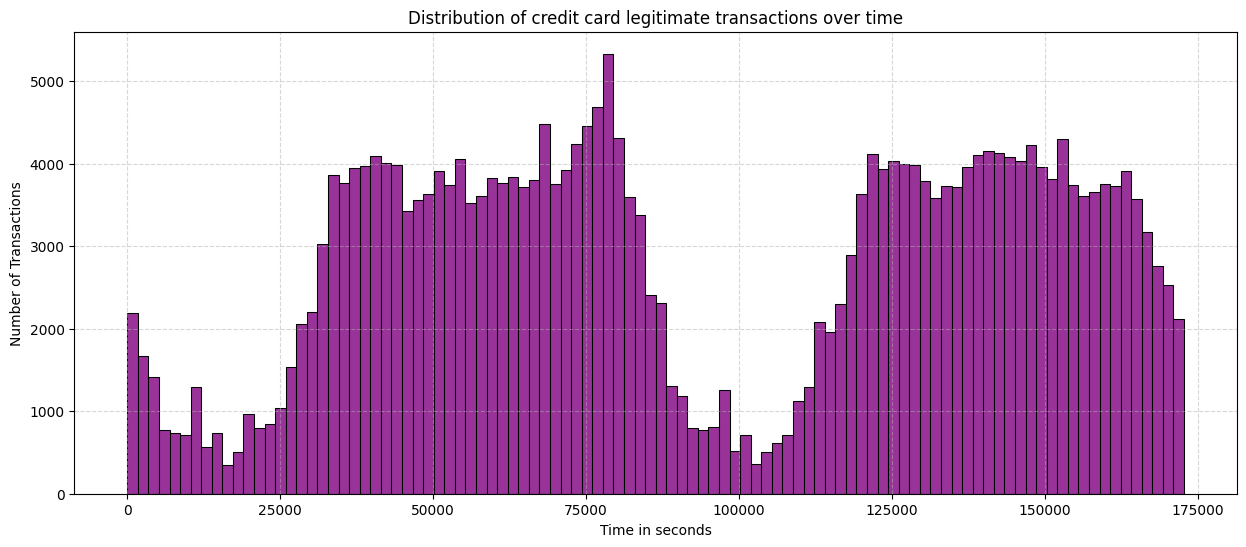

In [13]:
plt.figure(figsize=(15,6))
sns.histplot(data.Time[data.Class == 0], bins=100, alpha=0.8, color="purple")
plt.grid(linestyle='--', alpha=0.5)
plt.title("Distribution of credit card legitimate transactions over time")
plt.ylabel("Number of Transactions")
plt.xlabel("Time in seconds")

Text(0, 0.5, 'Amount')

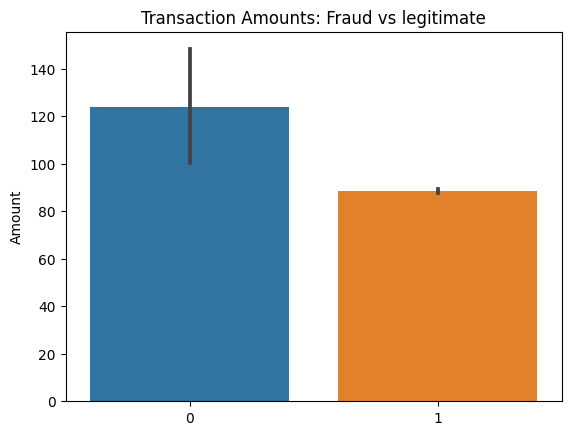

In [14]:
fraud_amount = data[data["Class"] == 1]["Amount"]
leg_amount = data[data["Class"] == 0]["Amount"]

sns.barplot([fraud_amount, leg_amount])
plt.title('Transaction Amounts: Fraud vs legitimate')
plt.ylabel('Amount')

(-1.099999999932092, 1.0999999999967662, -1.099999999774967, 1.099999999980644)

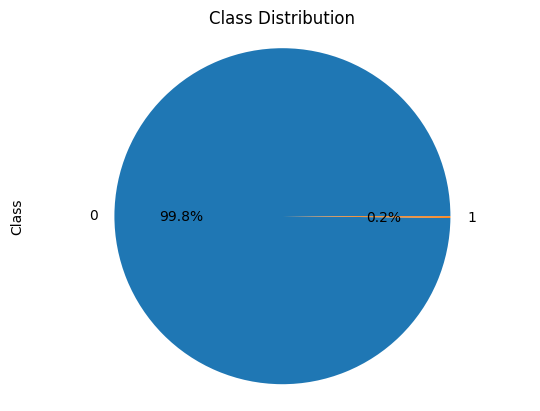

In [15]:
# Calculate and visualize the class distribution

data["Class"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title('Class Distribution')
plt.axis('equal')

Text(0.5, 1.0, 'Average Time for Fraud and Legitimate Class')

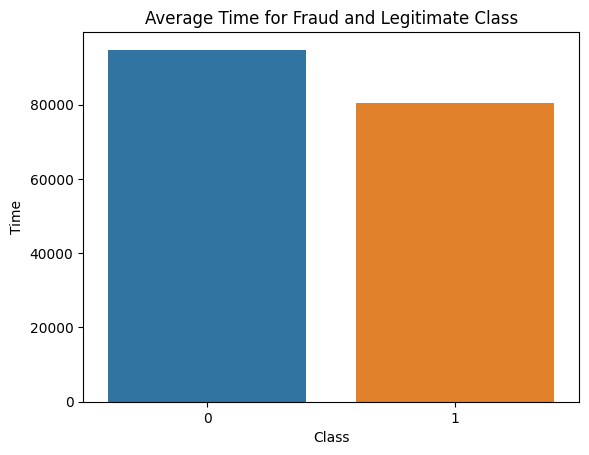

In [16]:
avg_time = data.groupby("Class")["Time"].mean().reset_index()

sns.barplot(avg_time, x='Class', y='Time')
plt.title("Average Time for Fraud and Legitimate Class")

Text(0.5, 1.0, 'Average Amount for Fraud and Legitimate Class')

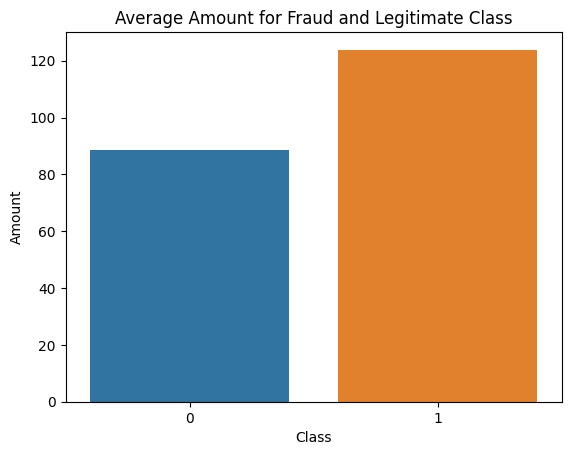

In [17]:
avg_amount = data.groupby("Class")["Amount"].mean().reset_index()

sns.barplot(avg_amount, x='Class', y='Amount')
plt.title("Average Amount for Fraud and Legitimate Class")

<AxesSubplot: >

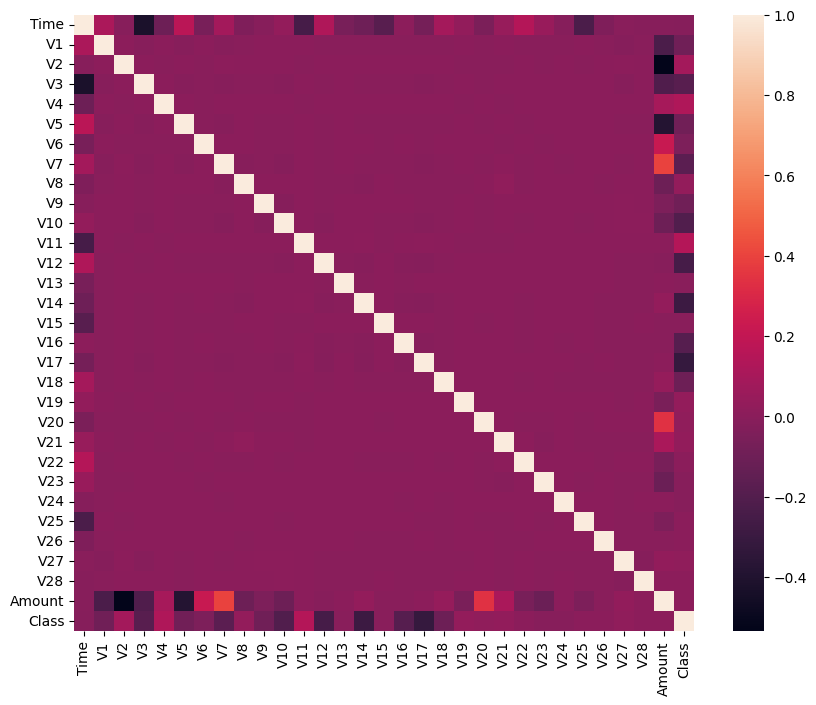

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr())

#  Modeling

In [19]:
X = data.drop("Class", axis=1)
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [20]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
confusion_matrix(y_test, y_preds)

array([[56655,     1],
       [   26,    64]], dtype=int64)

In [33]:
y_preds = model.predict(X_test)

In [29]:
def show_scores(model):
    y_preds = model.predict(X_test)
    scores = {"Test MAE": mean_absolute_error(y_test, y_preds),
              "Accuracy Score": accuracy_score(y_test, y_preds),
              "Test R^2": r2_score(y_test, y_preds),
              "matthews corrcoef": matthews_corrcoef(y_test, y_preds)}
    return scores

In [34]:
show_scores(model)

{'Test MAE': 0.0004758044619885102,
 'Accuracy Score': 0.9995241955380115,
 'Test R^2': 0.6995234397062977,
 'matthews corrcoef': 0.8365568584549206}

In [36]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.98      0.71      0.83        90

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746

